In [1]:
import matplotlib.pyplot as plt
import scienceplots  # noqa: F401
import numpy as np
import pandas as pd

plt.style.use(["science", "ieee", "notebook"])

plt.rcParams["font.size"] = 12
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["figure.figsize"] = (9, 4)

In [2]:
def get_distribution(sheet_name: str) -> float:
    """
    Function to evaluate the Sauter Mean Diameter (SMD) of the given
    experiment under `data/particles.xlsx`.

    Returns
    dsp: The SMD in micra (μm)
    """
    data = pd.read_excel("data/particles.xlsx", sheet_name=sheet_name)
    xi, Di = data.iloc[:, 2], data.iloc[:, 6]
    dsp = sum(xi / 100) / (sum(xi / 100 / Di))
    print(dsp)

    plt.figure()
    plt.yticks(np.arange(0, 110, 10))
    plt.grid(alpha=0.3)
    plt.plot(Di, xi, ls="--", c="grey")
    plt.plot(Di, xi, marker="s", ls="", c="k", label="Amostra", ms=7)
    plt.axvline(dsp, label=r"d$_{sp}$", c="k")
    plt.legend(ncol=2)
    plt.xlabel("Diâmetro Médio (μm)")
    plt.ylabel("Frequência (%100)")
    plt.savefig(
        f"images/particle-distribution-{sheet_name}.pdf", bbox_inches="tight", dpi=300
    )
    plt.show()

    return dsp

734.9393097070842


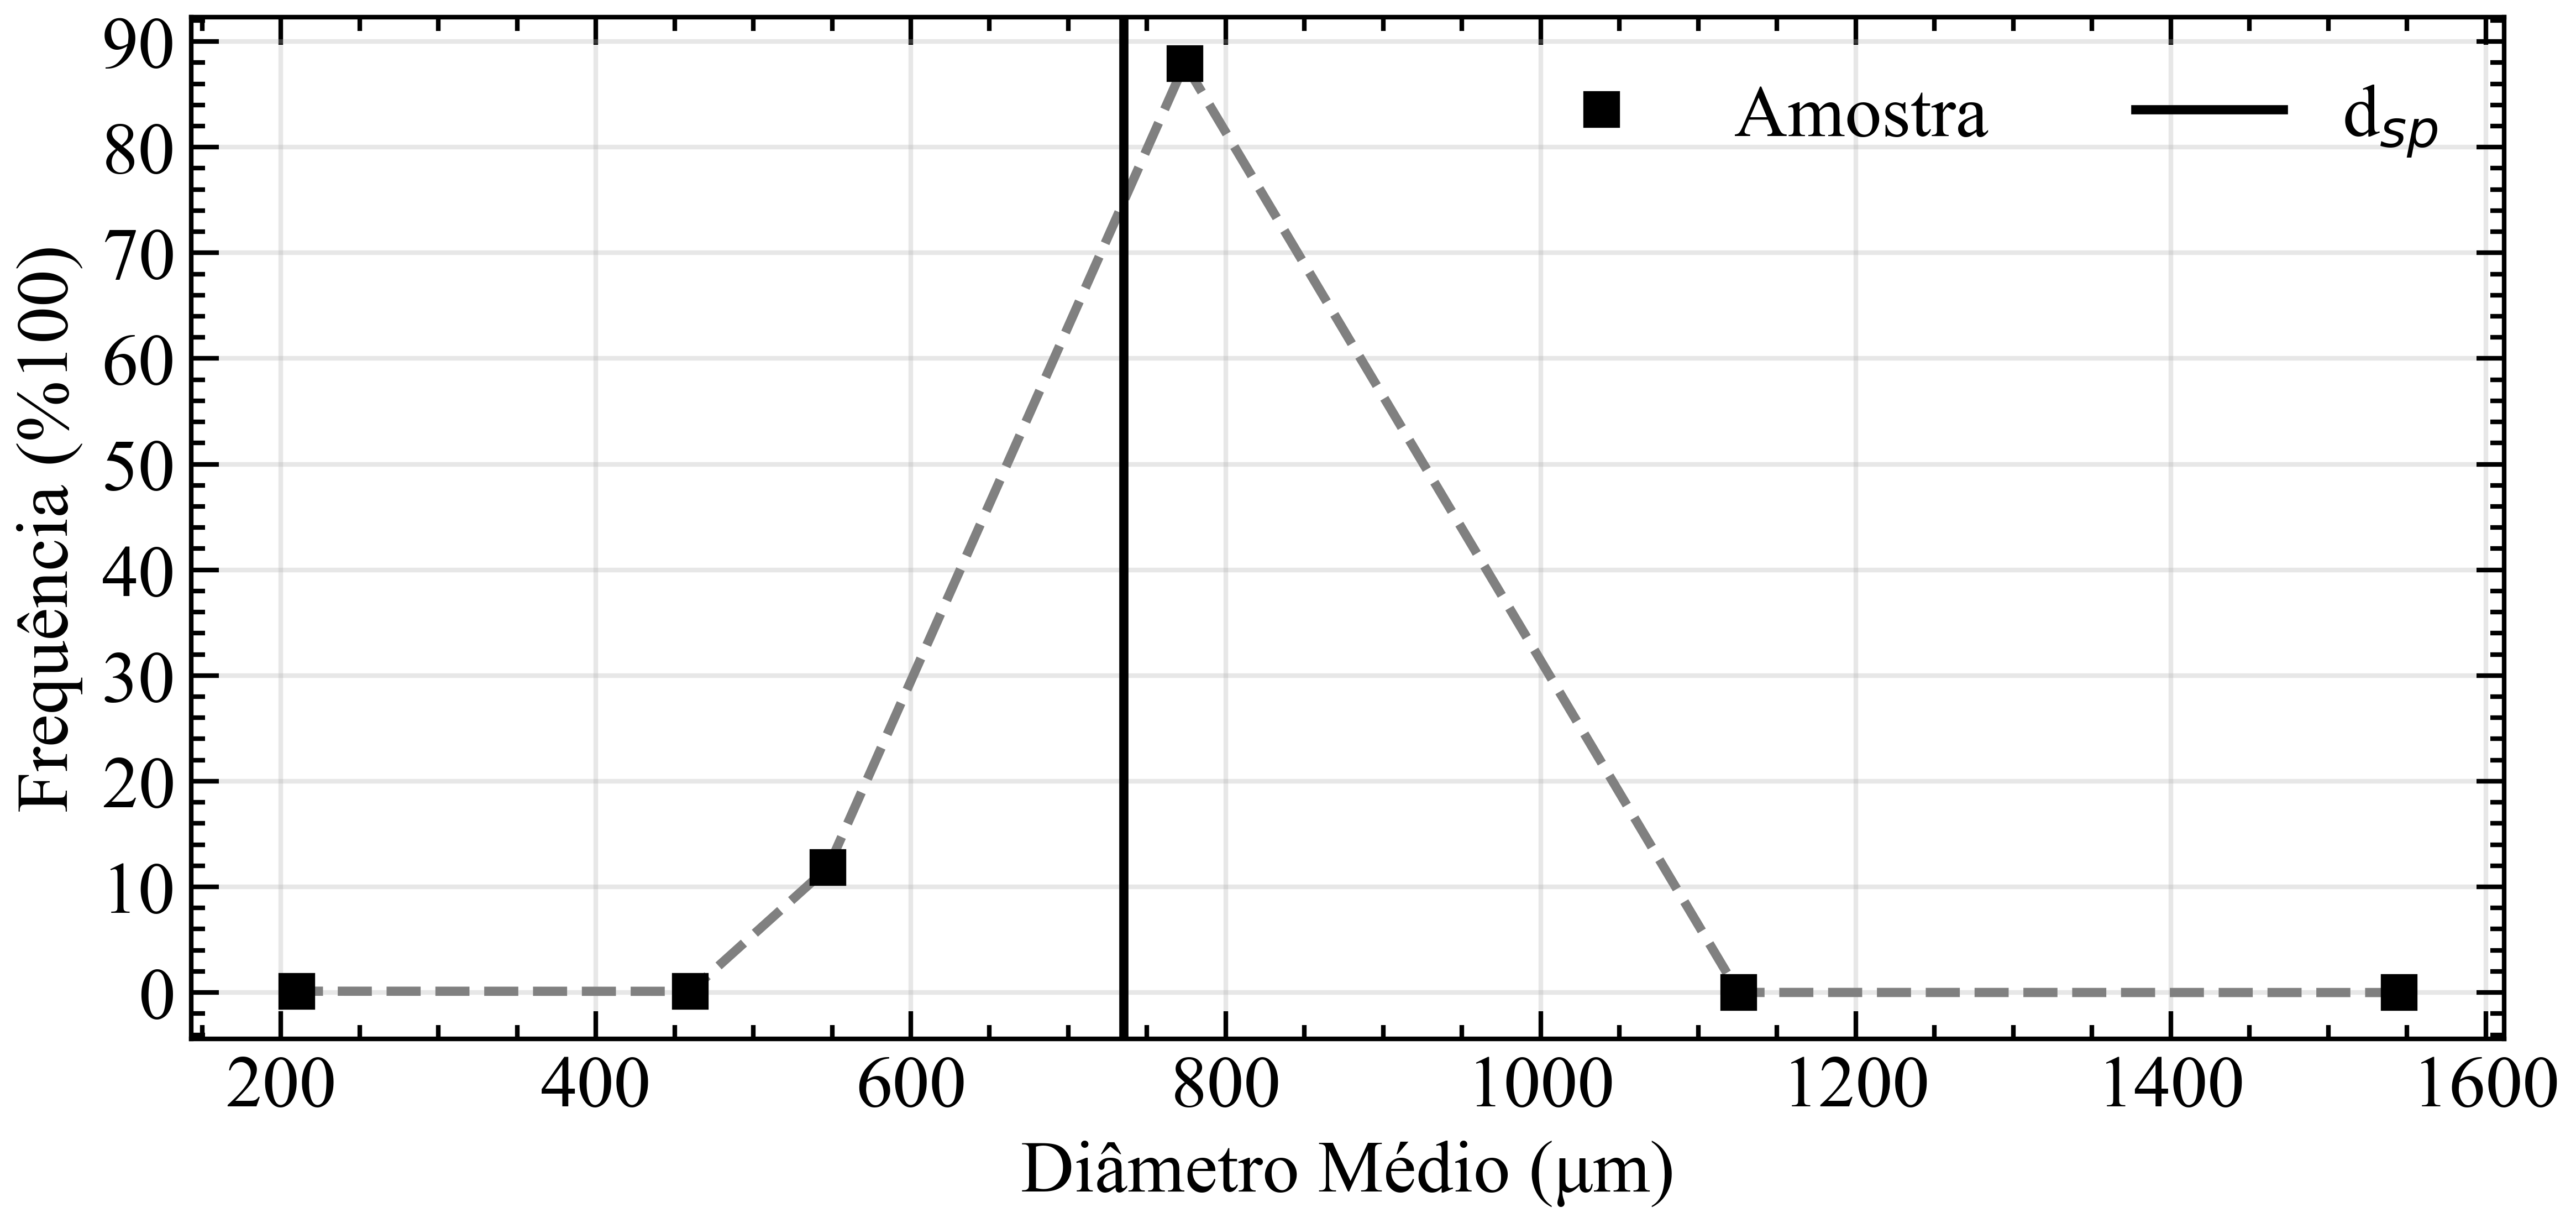

47.760392248458274


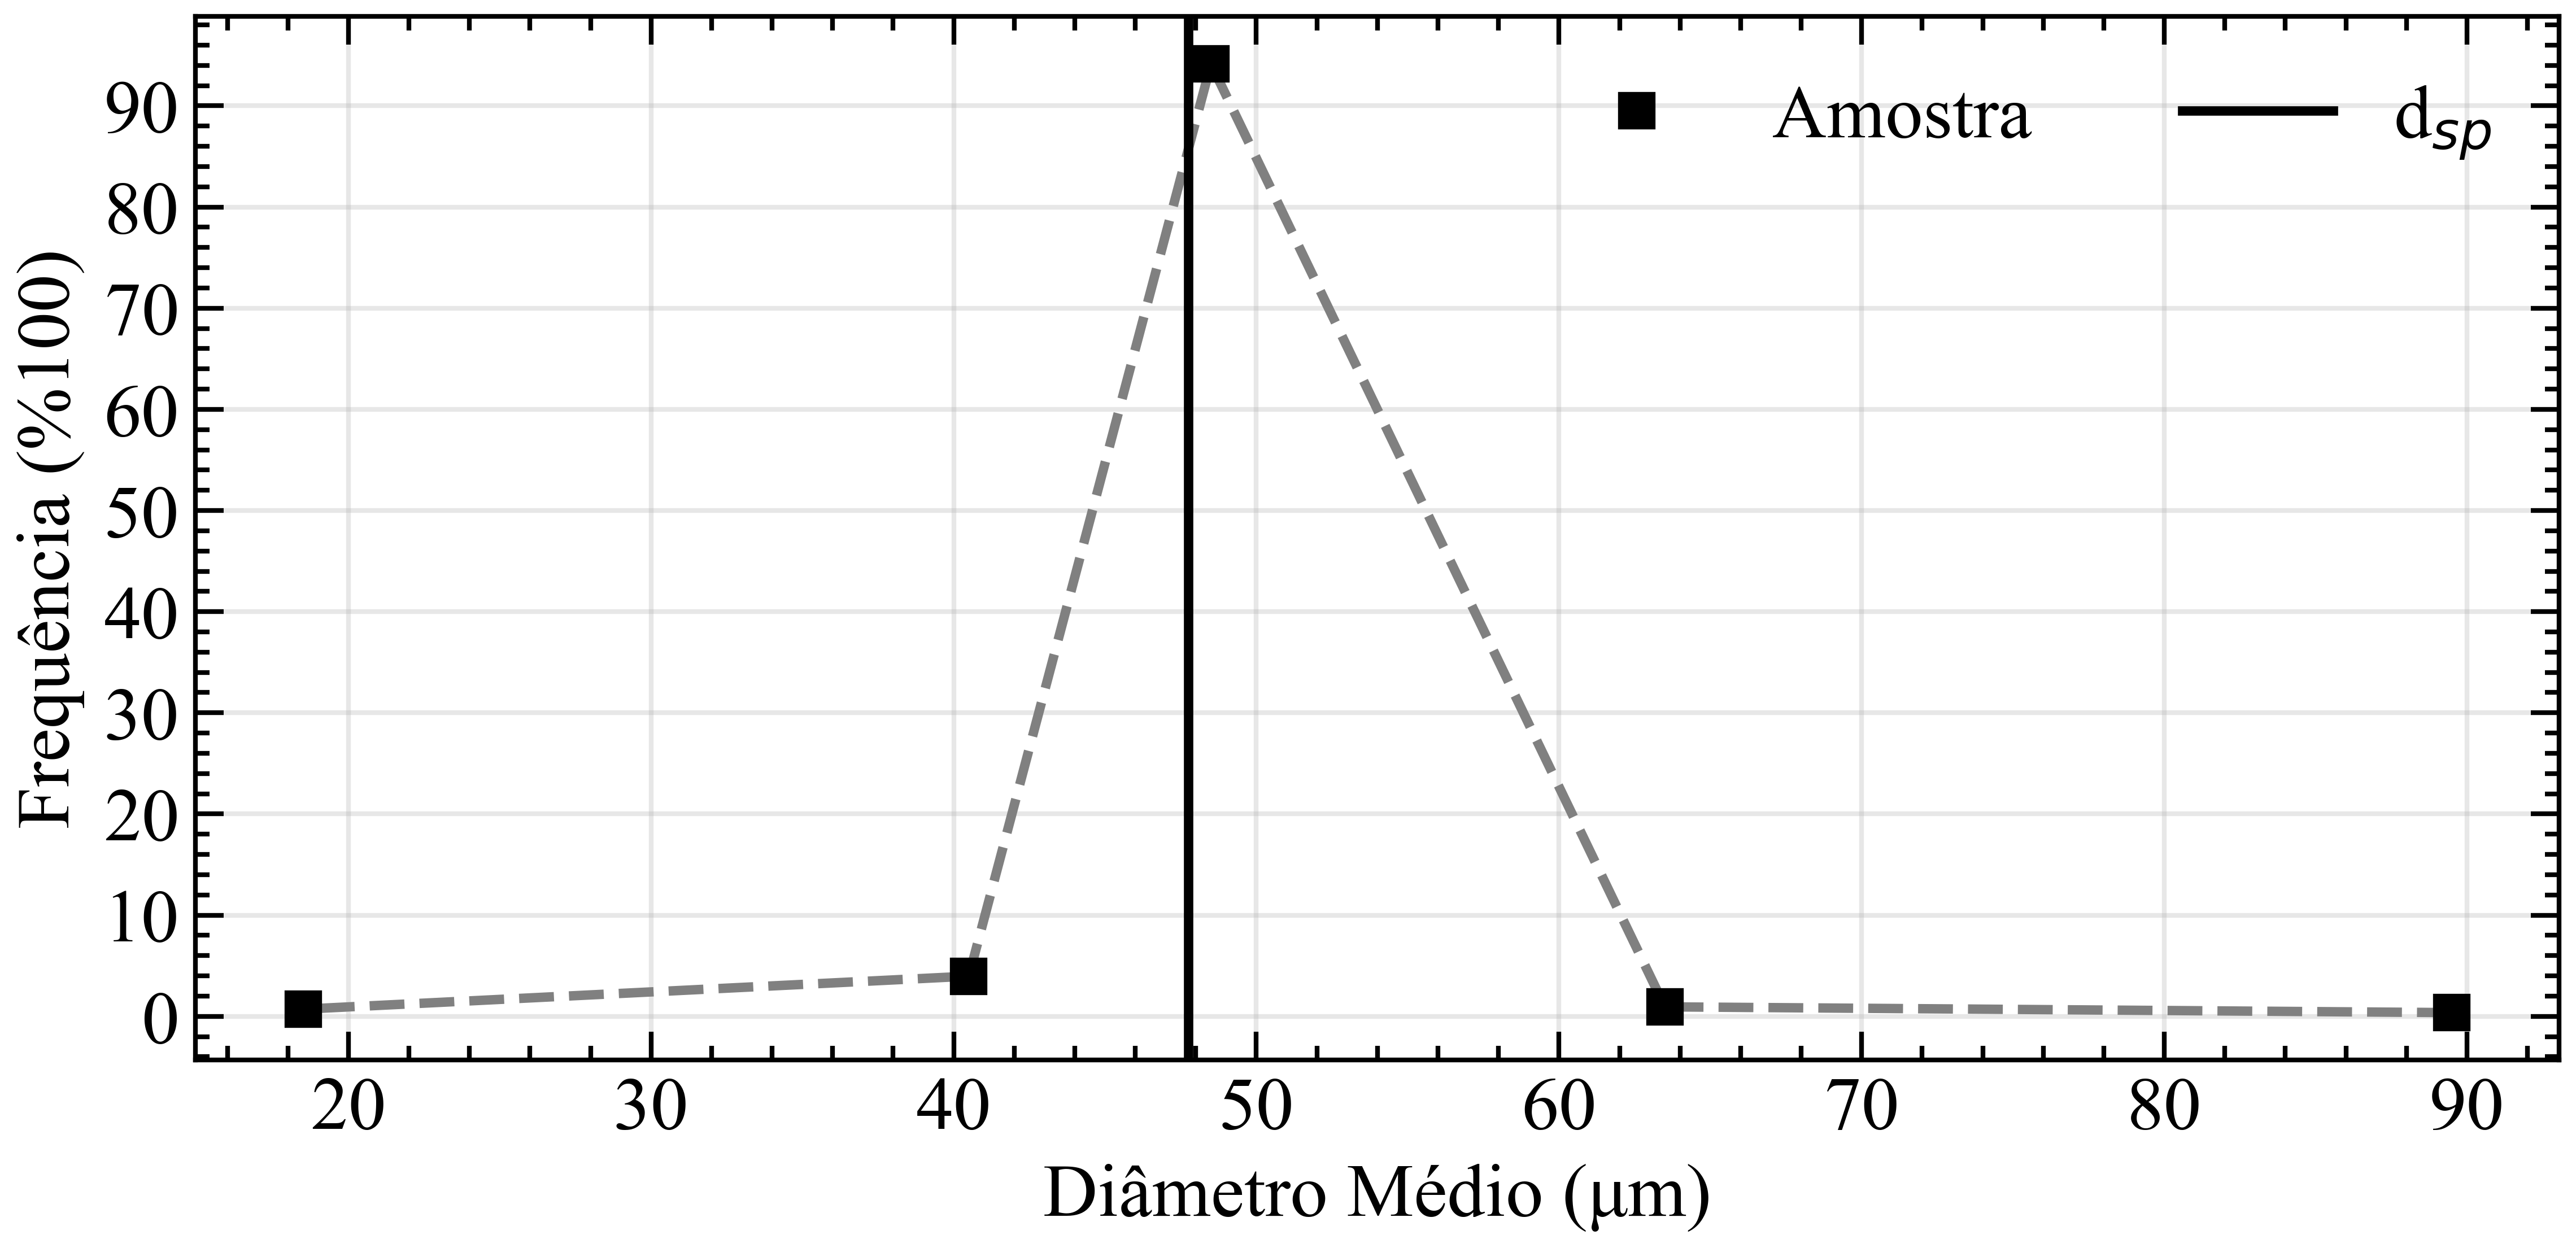

In [3]:
dsp1 = get_distribution("VIDRO-B (3)")
dsp2 = get_distribution("VIDRO-A")

dsps = [dsp1, dsp2]

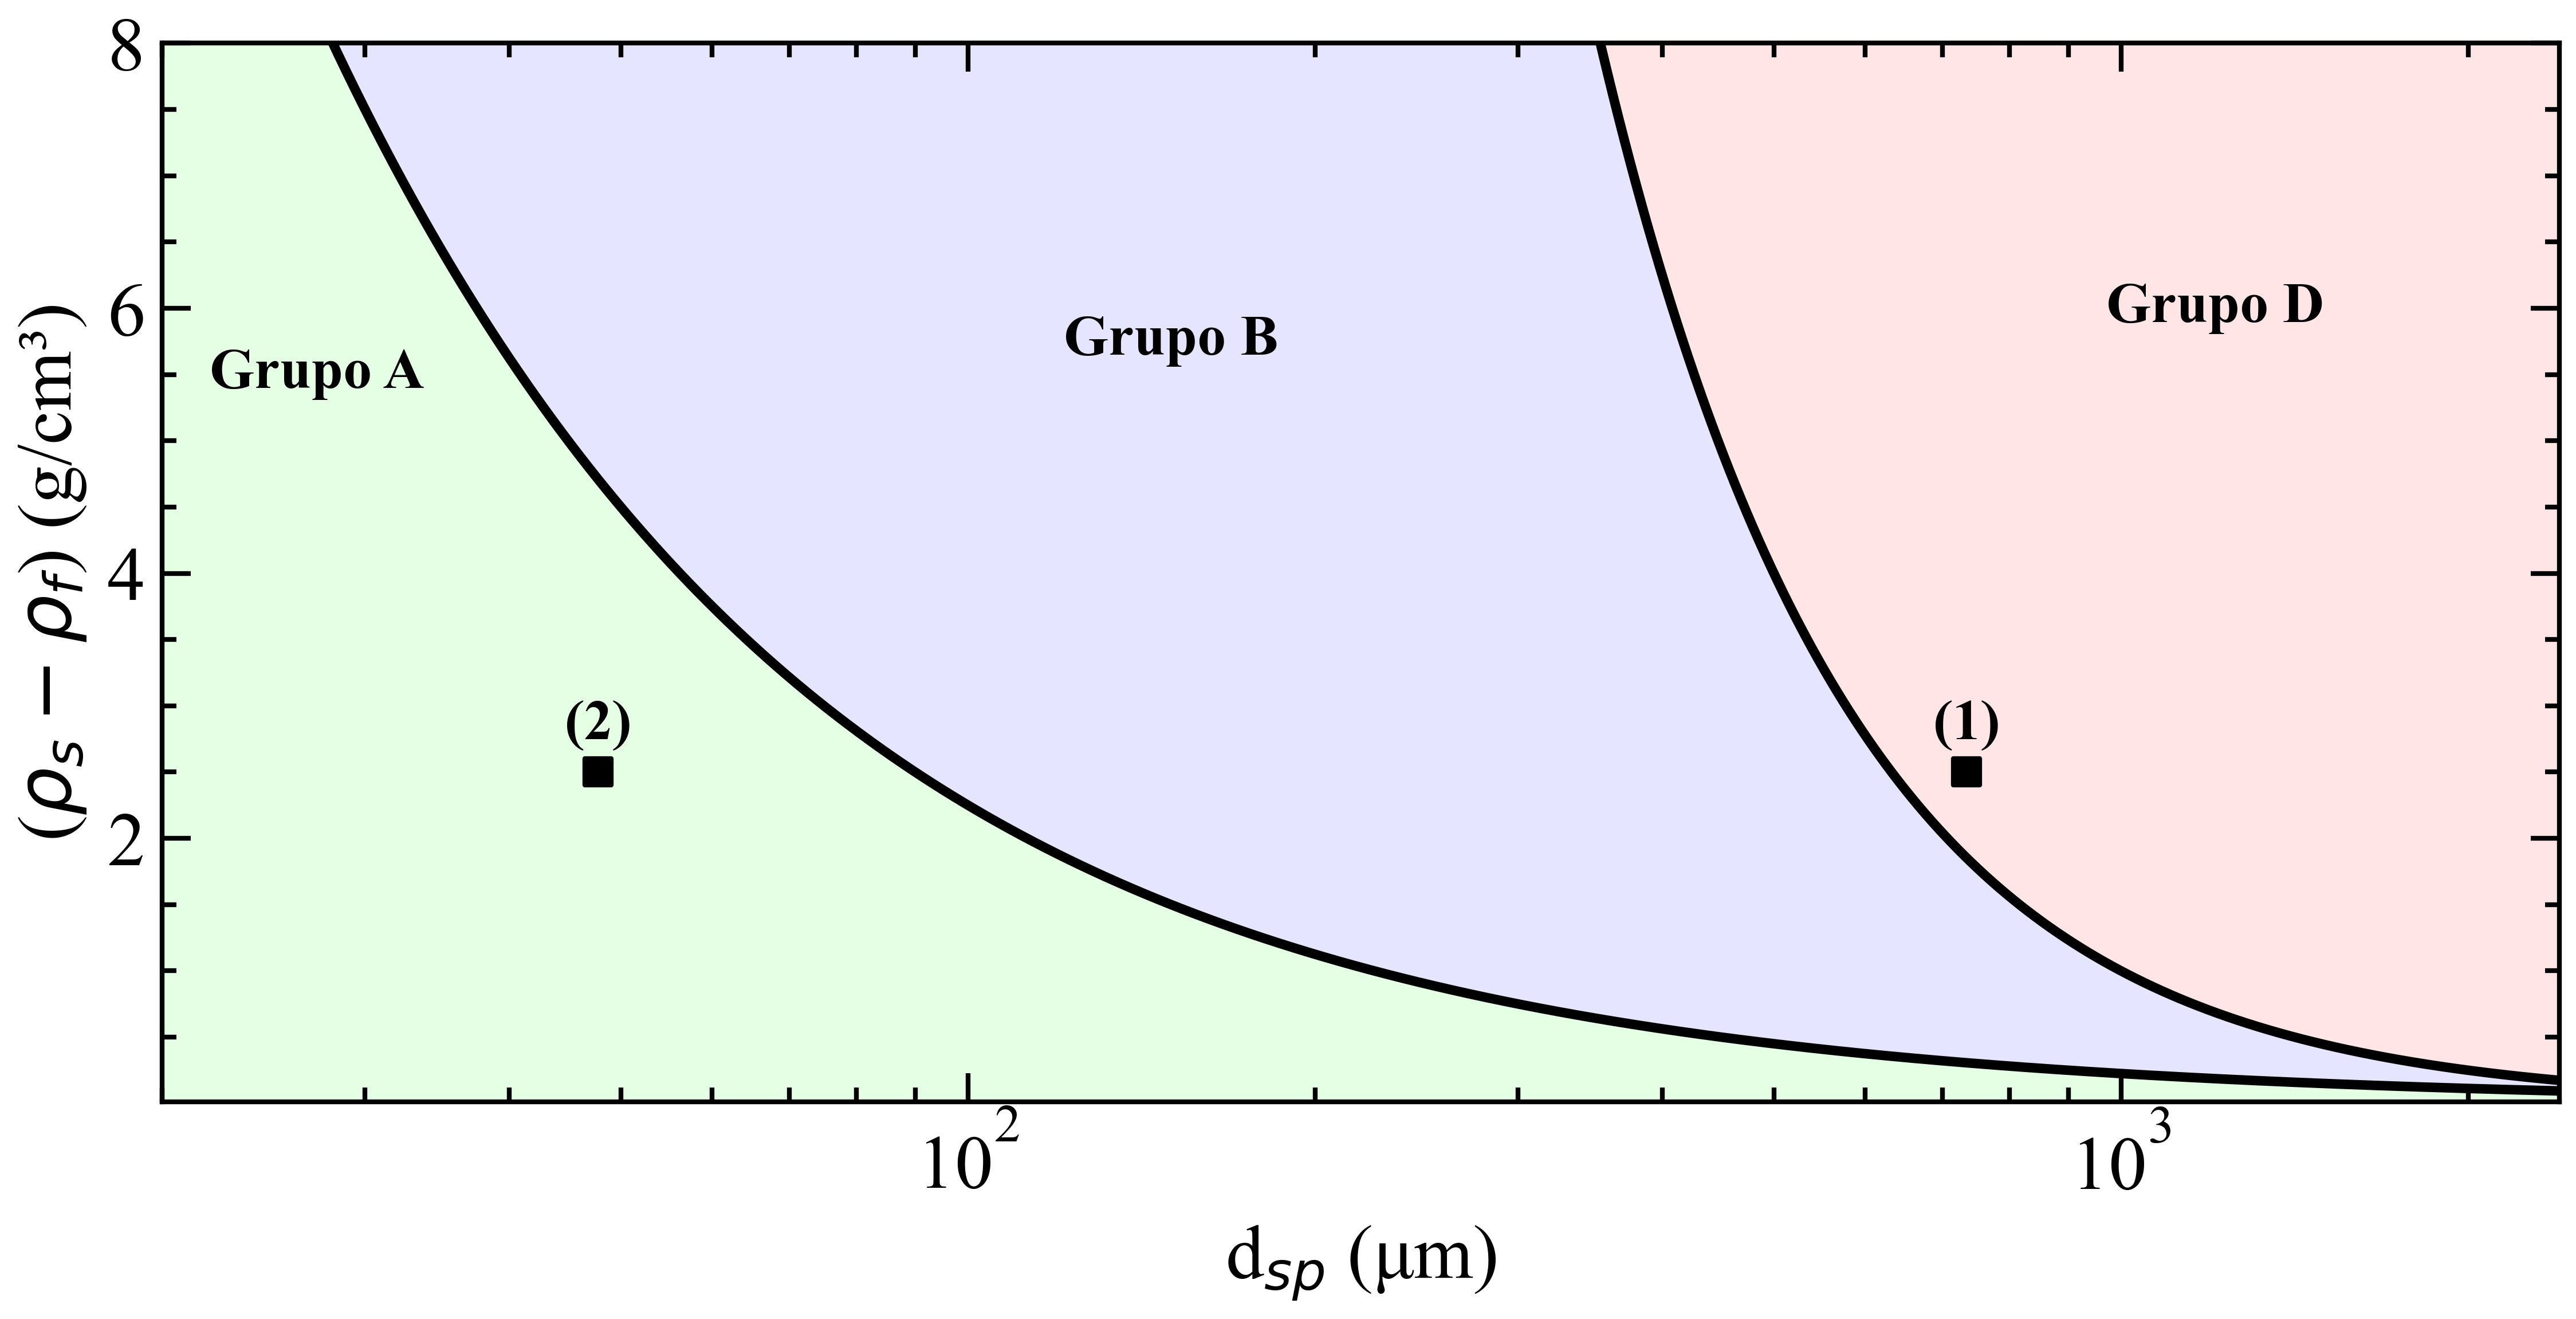

In [4]:
# plot geldart curve and insert the particles used in it
d_arange = np.arange(0.1, 2500, 0.01)  # particle size in μm

plt.figure(figsize=(9, 4))
plt.ylabel(r"($\rho_s - \rho_f$) (g/cm³)")
plt.xlabel(r"d$_{sp}$ (μm)")
plt.xlim(20, 2400)
plt.ylim(0.01, 8.0)
plt.xscale("log", base=10)

default_alpha = 0.10
# GRUPO A:
# (ps - pf)d' <= 225
rho_diff_A = 225 / d_arange
plt.plot(d_arange, rho_diff_A, "k-")
plt.fill_between(d_arange, 0, rho_diff_A, alpha=default_alpha, color="lime")

# Grupo D:
# (ps - pf)(d')^2 >= 10^6
rho_diff_D = 1e6 / (d_arange**2)
plt.plot(d_arange, rho_diff_D, "k-")
plt.fill_between(
    d_arange,
    rho_diff_A,
    rho_diff_D,
    where=(rho_diff_A < rho_diff_D),
    alpha=default_alpha,
    color="blue",
)
plt.fill_between(d_arange, rho_diff_D, 8, alpha=default_alpha, color="red")

# Add group labels as text
plt.text(22, 5.5, "Grupo A", ha="left", va="center", weight="bold")
plt.text(150, 5.75, "Grupo B", ha="center", va="center", weight="bold")
plt.text(1500, 6.0, "Grupo D", ha="right", va="center", weight="bold")

for dnum, dsp in enumerate(dsps):
    plt.scatter(dsp, 2.5, marker="s", c="k", s=30)
    plt.text(dsp, 2.75, f"({dnum + 1})", ha="center", weight="bold")

plt.savefig("images/particles-geldart.pdf", dpi=300, bbox_inches="tight")
plt.show()